### Data Preparation 

First, let's load the historical data of the IBOVESPA index into a `Dataframe` and perform an exploratory data analysis.


In [1]:
import pandas as pd

df = pd.read_csv('^BVSP-apr-1993-mar-2024.csv')

df

Mounted at /content/drive


,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-04-27,24.799999,25.400000,24.500000,24.500000,24.500000,0.0
1,1993-04-28,24.500000,24.600000,23.700001,24.299999,24.299999,0.0
2,1993-04-29,24.299999,24.799999,23.700001,23.700001,23.700001,0.0
3,1993-04-30,23.700001,24.200001,23.700001,24.100000,24.100000,0.0
4,1993-05-03,24.100000,24.400000,23.799999,24.100000,24.100000,0.0
...,...,...,...,...,...,...,...
7813,2024-03-04,129176.000000,129307.000000,128278.000000,128341.000000,128341.000000,7967700.0
7814,2024-03-05,128336.000000,128989.000000,127823.000000,128098.000000,128098.000000,9692200.0
7815,2024-03-06,128099.000000,129323.000000,128099.000000,128890.000000,128890.000000,11057900.0
7816,2024-03-07,128890.000000,129188.000000,128033.000000,128340.000000,128340.000000,7350000.0


The first step is to check if there are null values in the data set.

In [2]:
df.isna().sum()

Date           0
Open         178
High         178
Low          178
Close        178
Adj Close    178
Volume       178
dtype: int64

If these values exist, we can remove them without any loss to the analysis, as we know that the stock market does not operate on weekends and holidays, and therefore, there is no trading. Thus, there is no data for these days, the time series is continuous for business days.


In [3]:
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

The next step is to remove the `Date` column, as we will not use it in the analysis. We will use the index of the `Dataframe` as the index of the time series.

In [4]:
df = df.drop(columns=['Date'])

df

,Open,High,Low,Close,Adj Close,Volume
0,24.799999,25.400000,24.500000,24.500000,24.500000,0.0
1,24.500000,24.600000,23.700001,24.299999,24.299999,0.0
2,24.299999,24.799999,23.700001,23.700001,23.700001,0.0
3,23.700001,24.200001,23.700001,24.100000,24.100000,0.0
4,24.100000,24.400000,23.799999,24.100000,24.100000,0.0
...,...,...,...,...,...,...
7635,129176.000000,129307.000000,128278.000000,128341.000000,128341.000000,7967700.0
7636,128336.000000,128989.000000,127823.000000,128098.000000,128098.000000,9692200.0
7637,128099.000000,129323.000000,128099.000000,128890.000000,128890.000000,11057900.0
7638,128890.000000,129188.000000,128033.000000,128340.000000,128340.000000,7350000.0


After sanitizing the time series, we need to understand the data distribution and define the target variable.



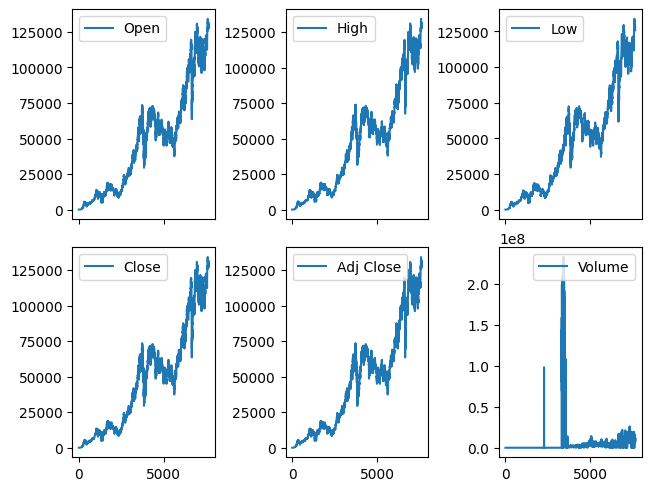

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, sharex=True, sharey=False, layout="constrained")

for col, ax in zip(df.columns, axs.flat):
    ax.plot(df.index, df[col], label=col)
    ax.legend()

plt.show()

In [6]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999875,0.999814,0.999690,0.999690,0.148500
High,0.999875,1.000000,0.999824,0.999865,0.999865,0.148776
Low,0.999814,0.999824,1.000000,0.999890,0.999890,0.148291
Close,0.999690,0.999865,0.999890,1.000000,1.000000,0.148803
Adj Close,0.999690,0.999865,0.999890,1.000000,1.000000,0.148803
Volume,0.148500,0.148776,0.148291,0.148803,0.148803,1.000000


From the analysis of the above graphs and correlation matrix, we can observe that the `Volume` variable has low correlation with the other variables (indicating price), suggesting that it is not a good candidate to be the target variable. Therefore, we will remove it from the dataset.


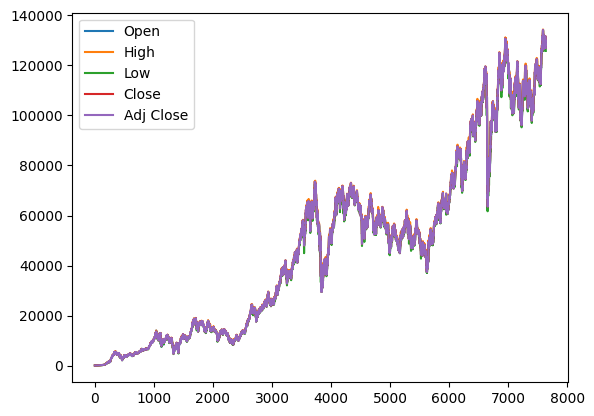

In [7]:
df = df.drop(columns=['Volume'])

for col in df.columns:
    plt.plot(df.index, df[col], label=col)
    plt.legend()

plt.show()

It is noted that the remaining variables have a high correlation with each other, suggesting that they are results of the same phenomenon.

In this case, it is difficult to predict which variable is the most appropriate to be the target variable. However, we can consider defining these variables according to specialized literature.

According to the literature, the adjusted closing price (`Adj Close`) should be the most appropriate variable for analysis, as it carries more context than the others.

> While the closing price simply refers to the cost of shares at the end of the day, the adjusted closing price takes dividends, stock splits, and new stock offerings into account. The adjusted closing price is a more accurate indicator of stock value since it starts where the closing price finishes.
>
> Ref. https://groww.in/p/adjusted-closing-price#:~:text=While%20the%20closing%20price%20simply,where%20the%20closing%20price%20finishes.

In [8]:
data = df[['Adj Close']]
data

,Adj Close
0,24.500000
1,24.299999
2,23.700001
3,24.100000
4,24.100000
...,...
7635,128341.000000
7636,128098.000000
7637,128890.000000
7638,128340.000000


### Training and Testing Data

For the construction of the prediction model, we need to split the dataset into training and testing partitions.

The choice of the "split point" is a critical factor for the quality of the model, as, considering the goal of creating a model capable of "predicting the future", it is important that the training and testing data have `low correlation` with each other, but are `representative of the dataset`.

To avoid the problem of `overfitting`, we will partition the data so that the `correlation` between the training and testing sets is minimal.

We will implement a function that helps us find the ideal `split point` for dividing the data, called `get_split_point`. Considering the following formula:

$$
C(t) = E[X(s) * X(t+s)] - E[X(s)] * E[X(t+s)]
$$

Where:
- $C(t)$ is the autocorrelation of $X$ for lag $t$
- $t$ is the lag (delay between random variables X(s) and X(t+s))
- $s$ is the time instant
- $E$ is the mathematical expectation operator (expected value)
- $X$ is the time series

Autocorrelation is a measure of `correlation` between the values of the time series at different time instants, that is, it is a measure of `correlation` between the time series and itself shifted in time.

To simplify the analysis, we will assume the hypothesis that the time series is `stationary`, that is, that the mean and variance of the data do not vary with time.

Thus we have that  $E[X(s)] = \mu$ and $E[X(t+s)] = \mu$, so:

$$
C(t) = E[X(s) * X(t+s)] - E[X(s)]^2
$$


The function `get_split_point` returns the `lag` value that minimizes the absolute value of the autocorrelation, that is, the `lag` value that maximizes the `independence` between the time series of training and testing.

Upon finding the first result less than or equal to zero, we return the `lag` value, as extremely negative correlations may indicate that the datasets are `inversely` correlated, which is also not desirable.


In [9]:
def get_split_point(values):
    """
    C(t) = E[X(s)X(t+s)] - E[X(s)]E[X(t+s)]
    """
    corr_t = 1
    t = 1
    while corr_t > 0 and t < len(data):
        # t=1 <-> E[X(s)X(t+s)] = X(0)X(1) + X(1)X(2) + X(2)X(3) + ... + X(n-1)X(n)
        s = 0
        while s + t < len(data):
            corr_t += values[s] * values[s + t]
            s += 1
        corr_t = corr_t / len(data)

        # for stationary time series E[X(s)]E[X(t+s)] = E[X(s)]^2
        corr_t -= values.mean() ** 2
        t += 1

    return t


The size of the training data set (`train_size`) will be equal to the result of the `get_split_point` function, while the size of the test data set (`test_size`) will be equal to the size of the original data set minus `double` the size of the training data set.

> Here, we are adding a "gap" of size `train_size` between the training and test data sets, to ensure that they are `independent` of each other.


In [10]:
train_size = get_split_point(data['Adj Close'].values)

train_data, test_data = data.iloc[0:train_size], data.iloc[train_size * 2:len(data)]

display(train_data)
display(test_data)

,Adj Close
0,24.500000
1,24.299999
2,23.700001
3,24.100000
4,24.100000
...,...
1195,10319.000000
1196,10319.000000
1197,10546.000000
1198,10557.000000


,Adj Close
2400,11912.0
2401,12243.0
2402,12110.0
2403,12175.0
2404,11971.0
...,...
7635,128341.0
7636,128098.0
7637,128890.0
7638,128340.0


### Data Normalization

To improve the accuracy of the model, we will normalize the training and testing data.

Normalization places the data in the range between 0 and 1, without distorting the differences in the ranges of values. That is, it does not remove outliers (extreme values).


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

display(train_data_scaled)
display(test_data_scaled)

array([[5.88524494e-05],
       [4.41392451e-05],
       [0.00000000e+00],
       ...,
       [7.74079878e-01],
       [7.74889100e-01],
       [7.75919019e-01]])

array([[0.87457056],
       [0.89892079],
       [0.88913656],
       ...,
       [9.4801336 ],
       [9.43967249],
       [9.34631767]])

### Data Preparation for Modeling

For modeling, we need to prepare the training and testing data so that they can be used to train and test the model. The training is done in the following way:

1. We split the training data into `X_train` and `y_train`, where `X_train` is a matrix containing sequences of `seq_length` values from the time series and `y_train` is a vector containing the subsequent value of the time series. e.g. `X_train[0]` contains the values from `X[0]` to `X[seq_length-1]` and `y_train[0]` contains the value of `X[seq_length]`;
2. The same is done for the test data, generating `X_test` and `y_test`.

The test data is used to evaluate the accuracy of the model.


In [12]:
import numpy as np

seq_length = 10

def to_sequences(data, seq_length):
    """
    Appends a sequence of length `seq_length` to the x array and
    the next value of the sequence to the y array.
    """
    x, y = [], []
    for index in range(len(data) - seq_length):
        x.append(data[index: index + seq_length])
        y.append(data[index + seq_length])
    return np.array(x), np.array(y)

X_train, y_train = to_sequences(train_data_scaled, seq_length)
X_test, y_test = to_sequences(test_data_scaled, seq_length)

assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]
assert X_train[0].shape[0] == seq_length

Before proceeding, let's set the `seed` to ensure the `reproducibility` of the results.

This way, if the code is run again, the results will be the same.


In [13]:
import tensorflow as tf

tf.random.set_seed(7)

### Modeling

As the title of the notebook suggests, we will use a LSTM type neural network as a model.

For the creation of the neural network, we will use the `Sequential` class from the Keras library. With `keras.Sequential`, it is possible to easily create a neural network by stacking layers, passing a list to the constructor. This makes the creation of neural networks simple and intuitive, especially for networks with a single input, a single output, and a linear sequence of intermediate layers.

The neural network will consist of 3 layers:
1. The first LSTM layer has `units` units (or neurons) and expects a three-dimensional input in the form `(seq_length, 1)`. This means that it expects sequences of length `seq_length` with a single feature at each time step. This feature in our case is the adjusted closing price of the stock on a given day.
2. The second LSTM layer also has `units` units and no longer needs to specify the input shape, as it can automatically assume the shape of the input from the previous layer.
3. The last layer is a `Dense` layer with a single neuron, which is used to produce the output of the network. As it is a regression task (predicting a single value), a single output is sufficient.


Next, we compile the model, specifying the optimizer and the loss function (`loss`):

- `optimizer`: This is the optimizer that will be used to adjust the weights of the network during training, such as adam, sgd (stochastic gradient descent), among others. The optimizer is responsible for updating the network weights based on the gradients calculated during training, with the aim of minimizing the loss function.

- `loss`: This is the loss function that will be minimized during training. The loss function is a measure of how well the model is performing on its training data, and is used by the optimizer to adjust the network weights. For regression problems, it is common to use the `mean_squared_error` loss function to calculate the mean squared error between the model's predictions and the actual values. For other types of problems, such as classification, other loss functions can be used, such as `categorical_crossentropy` for categorical classification.

The `build_model` function returns the compiled model, it will be used to estimate which `hyperparameters` are most suitable for the model.

> The hyperparameters of a model are settings that are not learned during the training of the model, but that directly affect the training process and the final performance of the model. These hyperparameters are defined before the start of training

To find the most suitable hyperparameters for the model, we will use the `grid search` technique, which consists of testing all possible combinations of hyperparameters (defined in a `param_grid` object) and choosing the one that results in the best performance of the model.

The estimator used for the grid search is the `KerasRegressor`, which is a class that encapsulates the neural network model created with Keras, allowing it to be used as a scikit-learn estimator.

> In scikit-learn, an estimator is any object that can estimate parameters from a dataset. This includes machine learning algorithms, such as linear regression models, decision trees, support vector machines (SVMs), among others.




In [14]:
import keras
from scikeras.wrappers import KerasRegressor

def build_model(optimizer='adam', loss='mean_squared_error', units=64):
    model = keras.Sequential([
        keras.layers.LSTM(units=units, input_shape=(seq_length, 1), return_sequences=True),
        keras.layers.LSTM(units),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer, loss=loss)
    return model

lstm_estimator = KerasRegressor(build_fn=build_model, verbose=2, units=32)

Now, we will define the `param_grid` object that contains the combinations of hyperparameters that will be tested.

Then, we will instantiate a `GridSearchCV` object that will be used to perform the grid search.

Finally, the `fit` method will train and evaluate the model for all combinations of hyperparameters defined in `param_grid`, returning the combination that resulted in the best performance of the model.


In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'optimizer': ['adam', 'rmsprop', 'sgd'],
    'units': [32, 64, 128, 256],
    'batch_size': [16, 32, 64, 128],
    'epochs': [50, 100, 150]
}

grid = GridSearchCV(estimator=lstm_estimator, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/150
38/38 - 3s - loss: 0.0185 - 3s/epoch - 85ms/step
Epoch 2/150
38/38 - 0s - loss: 7.3699e-04 - 186ms/epoch - 5ms/step
Epoch 3/150
38/38 - 0s - loss: 6.8983e-04 - 171ms/epoch - 5ms/step
Epoch 4/150
38/38 - 0s - loss: 6.2206e-04 - 172ms/epoch - 5ms/step
Epoch 5/150
38/38 - 0s - loss: 6.0692e-04 - 170ms/epoch - 4ms/step
Epoch 6/150
38/38 - 0s - loss: 6.4032e-04 - 173ms/epoch - 5ms/step
Epoch 7/150
38/38 - 0s - loss: 7.0593e-04 - 173ms/epoch - 5ms/step
Epoch 8/150
38/38 - 0s - loss: 5.6302e-04 - 175ms/epoch - 5ms/step
Epoch 9/150
38/38 - 0s - loss: 6.0001e-04 - 166ms/epoch - 4ms/step
Epoch 10/150
38/38 - 0s - loss: 5.6685e-04 - 175ms/epoch - 5ms/step
Epoch 11/150
38/38 - 0s - loss: 5.5942e-04 - 167ms/epoch - 4ms/step
Epoch 12/150
38/38 - 0s - loss: 5.0559e-04 - 165ms/epoch - 4ms/step
Epoch 13/150
38/38 - 0s - loss: 5.3937e-04 - 171ms/epoch - 5ms/step
Epoch 14/150
38/38 - 0s - loss: 6.6102e-04 - 172ms/epoch - 5ms/step
Epoch 15/150
38/38 - 0s - loss: 5.6934e-04 - 172ms/epoch - 5ms/

In [33]:
f'Best score: {grid_result.best_score_} with {grid_result.best_params_}'

"Best score: 0.9868762478528597 with {'batch_size': 32, 'epochs': 150, 'optimizer': 'rmsprop', 'units': 256}"

Finally, we will create a model with the found hyperparameters and train it with the training data.

In [27]:
model = tf.keras.Sequential([
    keras.layers.LSTM(units=256, input_shape=(seq_length, 1), return_sequences=True),
    keras.layers.LSTM(256),
    keras.layers.Dense(1)
])

model.compile(optimizer='rmsprop', loss='mean_squared_error')

In [34]:
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=2)

Epoch 1/150
38/38 - 0s - loss: 2.5000e-04 - 175ms/epoch - 5ms/step
Epoch 2/150
38/38 - 0s - loss: 2.5384e-04 - 170ms/epoch - 4ms/step
Epoch 3/150
38/38 - 0s - loss: 2.5012e-04 - 169ms/epoch - 4ms/step
Epoch 4/150
38/38 - 0s - loss: 2.5256e-04 - 166ms/epoch - 4ms/step
Epoch 5/150
38/38 - 0s - loss: 2.4923e-04 - 165ms/epoch - 4ms/step
Epoch 6/150
38/38 - 0s - loss: 2.4420e-04 - 174ms/epoch - 5ms/step
Epoch 7/150
38/38 - 0s - loss: 2.6634e-04 - 168ms/epoch - 4ms/step
Epoch 8/150
38/38 - 0s - loss: 2.4063e-04 - 173ms/epoch - 5ms/step
Epoch 9/150
38/38 - 0s - loss: 2.4734e-04 - 174ms/epoch - 5ms/step
Epoch 10/150
38/38 - 0s - loss: 2.4275e-04 - 177ms/epoch - 5ms/step
Epoch 11/150
38/38 - 0s - loss: 2.4168e-04 - 167ms/epoch - 4ms/step
Epoch 12/150
38/38 - 0s - loss: 2.3679e-04 - 172ms/epoch - 5ms/step
Epoch 13/150
38/38 - 0s - loss: 2.3359e-04 - 172ms/epoch - 5ms/step
Epoch 14/150
38/38 - 0s - loss: 2.4268e-04 - 174ms/epoch - 5ms/step
Epoch 15/150
38/38 - 0s - loss: 2.6182e-04 - 172ms/epoch 

The trained model will be used to make predictions with the test data.

In [35]:
predicted_values = model.predict(X_test)

164/164 [==============================] - 0s 2ms/step


### Model Evaluation
 
To evaluate the model, we will plot a graph with the model's predictions and the actual values and calculate the `MAPE` (Mean Absolute Percentage Error) statistic.


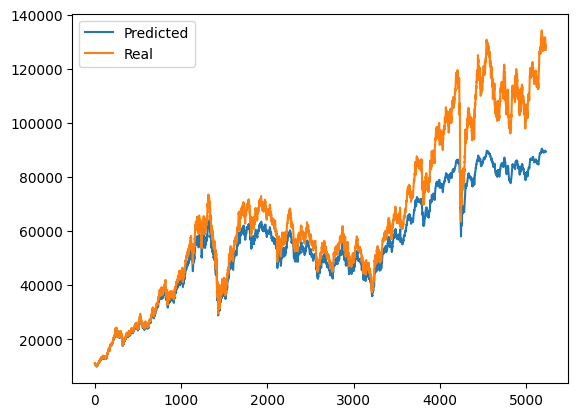

In [36]:
predicted = scaler.inverse_transform(predicted_values)
actual_y_test = scaler.inverse_transform(y_test)

plt.plot(predicted, label='Predicted')
plt.plot(actual_y_test, label='Real')
plt.legend()
plt.show()

The `MAPE` statistic, also known as `MAPD` (mean absolute percentage deviation), is a measure of a model's prediction accuracy.

It is calculated as the average of the absolute differences between the model's predictions and the actual values, divided by the actual value.

$$
MAPE = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right|
$$

The `MAPE` statistic is commonly used in regression problems, and was chosen because it is a measure of relative error that is easy to interpret.

Ref. https://en.wikipedia.org/wiki/Mean_absolute_percentage_error

![MAPE interpretation](https://www.researchgate.net/publication/257812432/figure/tbl1/AS:601657310203931@1520457689632/nterpretation-of-typical-MAPE-values.png)


In [37]:
def calculate_mape(predicted, actual):
  return  np.mean(np.abs((actual - predicted) / actual)) * 100

mape = calculate_mape(predicted, actual_y_test)

f'Mean Absolute Percentage Error: {mape}'

'Mean Absolute Percentage Error: 11.590251364551534'

### Results

According to the interpretation of the `MAPE` statistic, we obtained a `good predictor` for the time series of adjusted closing stock prices.

### Next Steps

This result is promising, but there is still room for improvement, which is indeed exciting!😄

- Implement a real-time forecasting model, capable of predicting the adjusted closing price of the stock based on the most recent data;
- Increase the frequency of the time series. Currently, we are using daily data, but we can use intraday data (for example, every 5 minutes) to predict the stock price over a shorter time horizon;
- Explore the prediction of change points in the time series, which may indicate opportunities for buying or selling stocks.
